In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
print(os.listdir('/content/Summary of Weather.csv'))

NotADirectoryError: [Errno 20] Not a directory: '/content/Summary of Weather.csv'

In [ ]:
print(os.listdir('/content/'))

['.config', 'Summary of Weather.csv', '.ipynb_checkpoints', 'sample_data']


In [ ]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()




In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
     columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Summary of Weather.csv has 119040 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Summary of Weather.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'Summary of Weather.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [ ]:
df1.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plotHistogram(df1, 10, 5)


In [ ]:
import matplotlib.pyplot as plt

def plotHistogram(df, n_hist_per_row, n_rows):
    """
    Plots histograms for all numerical columns in the dataframe.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    n_hist_per_row (int): Number of histograms per row.
    n_rows (int): Number of rows of histograms.
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(n_rows, n_hist_per_row, figsize=(15, 5 * n_rows))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        if i >= len(axes):
            break
        df[col].plot(kind='hist', ax=axes[i], title=col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
plotHistogram(df1, 10, 5)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    """
    Plots a correlation matrix for the DataFrame `df`.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    graphWidth (int): The width of the graph.
    """
    # Keep only numeric columns
    df = df.select_dtypes(include=[float, int])

    # Drop columns with NaN values
    df = df.dropna(axis=1)  # Drop columns with NaN

    # Keep columns with more than one unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        print(f"No correlation plots shown: the DataFrame doesn't have enough numerical columns.")
        return

    # Calculate the correlation matrix
    corr = df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(graphWidth, graphWidth))

    # Draw the heatmap
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)

    plt.title('Correlation Matrix', size=15)
    plt.show()



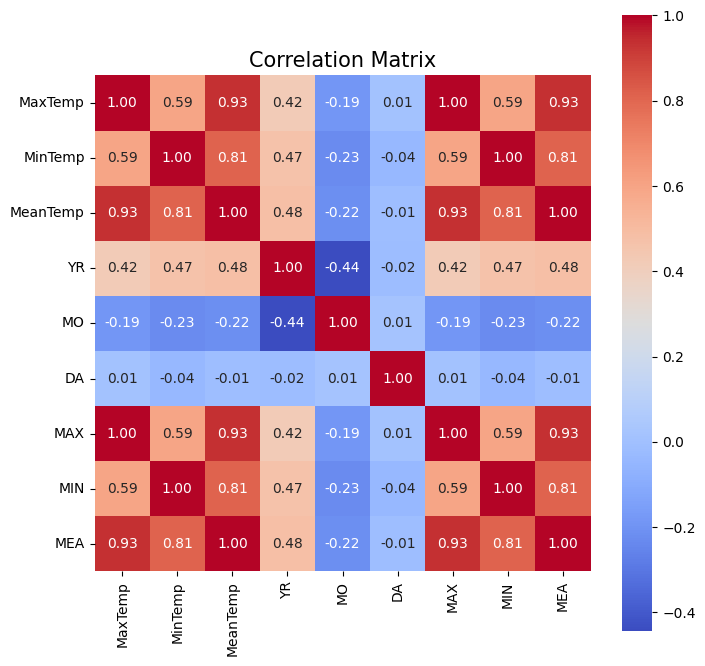

In [ ]:
#plotCorrelationMatrix(df1, 8)
plotCorrelationMatrix(df1, 8)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, plotSize, textSize):
    """
    Plots a scatter matrix for the DataFrame `df`.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    plotSize (int): The size of the scatter plot matrix.
    textSize (int): The size of the text in the plot.
    """
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep columns with more than one unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        print(f"No scatter matrix plot shown: the DataFrame doesn't have enough numerical columns.")
        return

    # Plot scatter matrix
    ax = scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde')

    # Change rotation of labels
    [plt.setp(item.yaxis.get_majorticklabels(), 'size', textSize) for item in ax.ravel()]
    [plt.setp(item.xaxis.get_majorticklabels(), 'size', textSize) for item in ax.ravel()]

    plt.show()


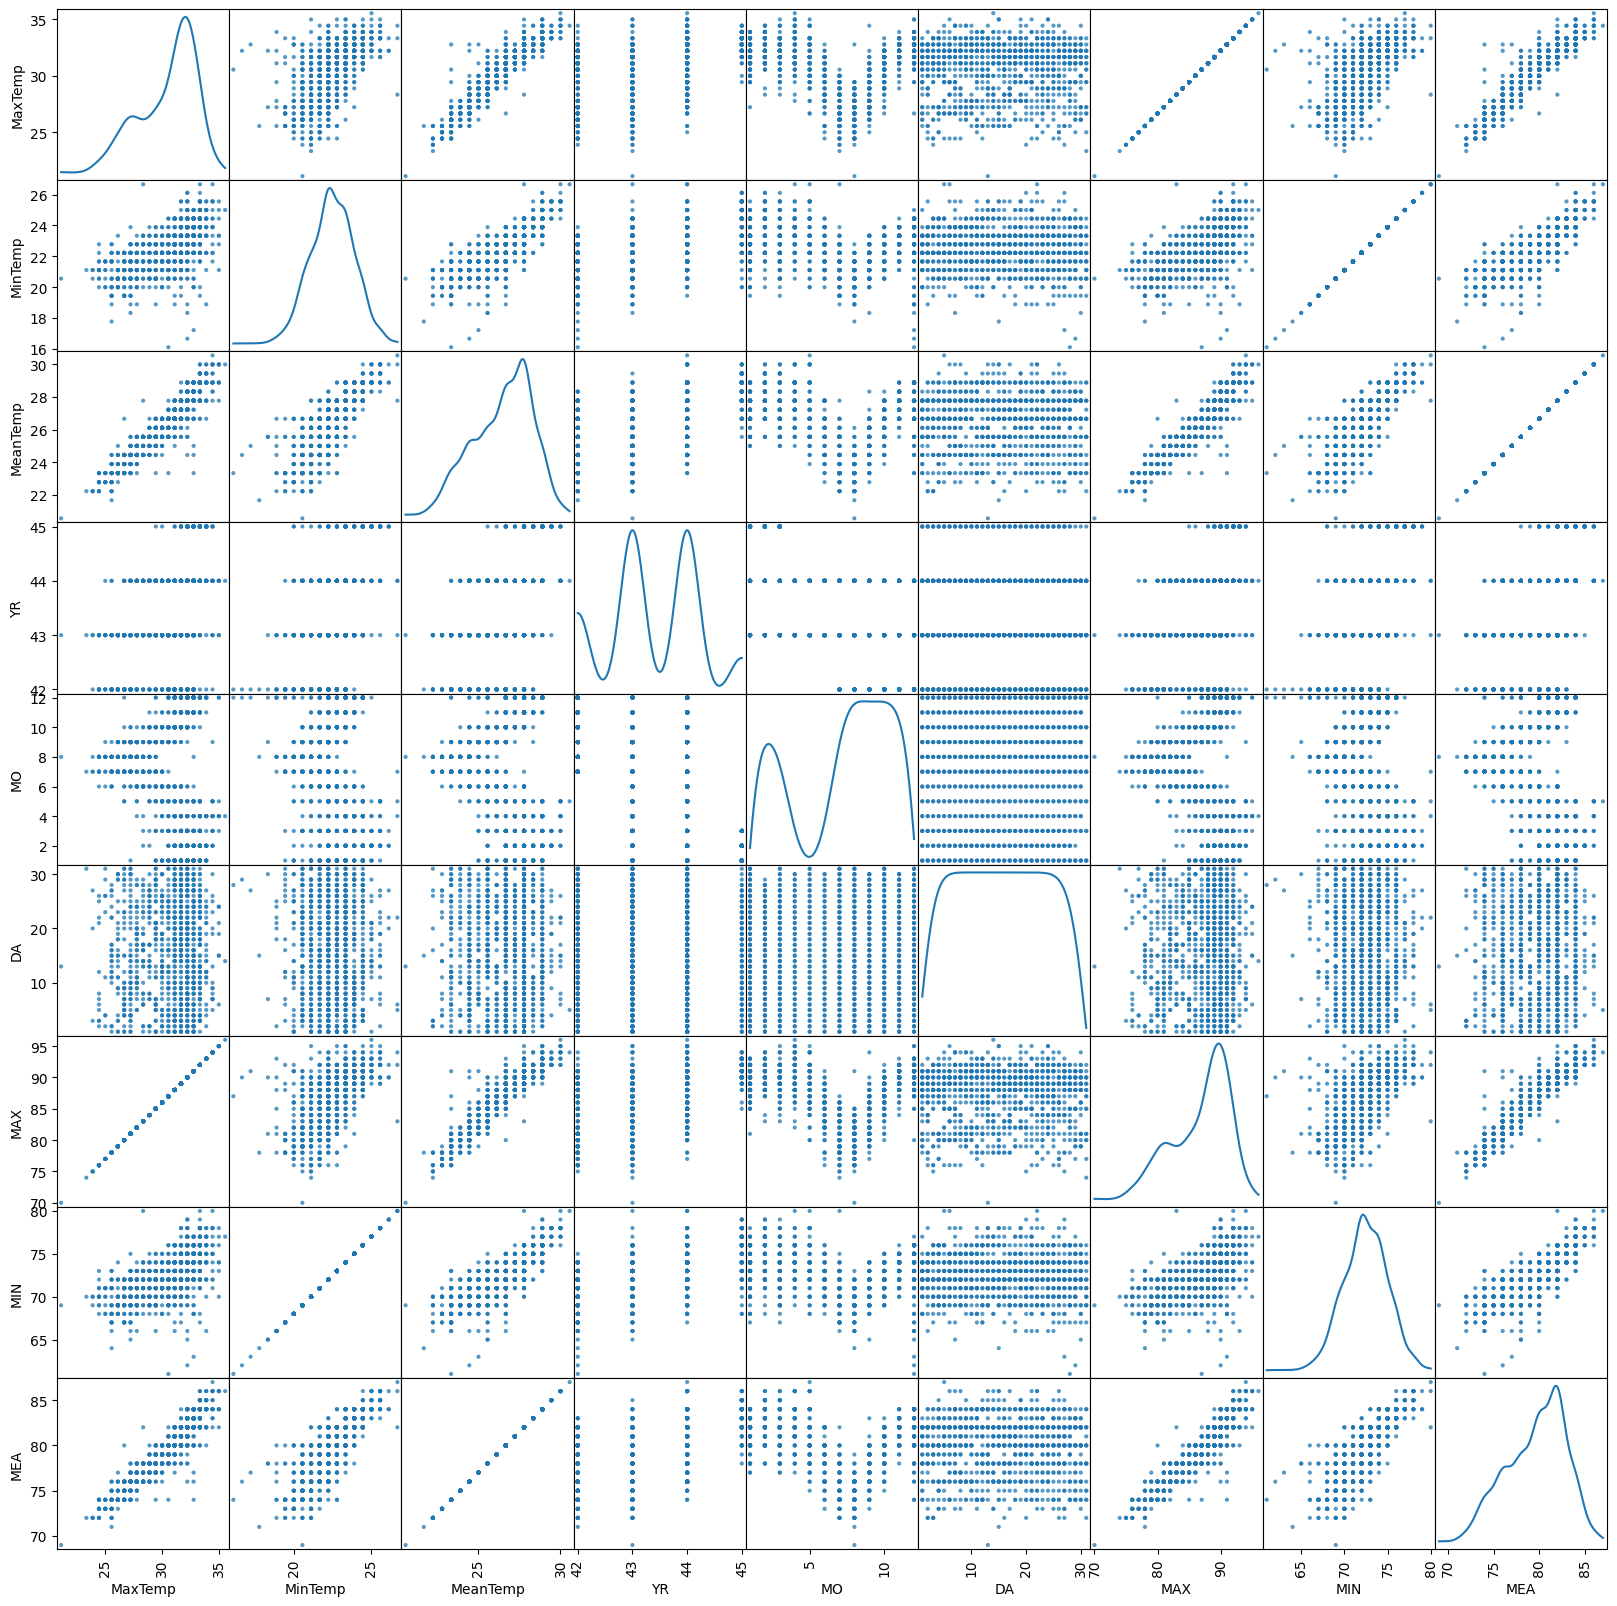

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Weather Station Locations.csv to Weather Station Locations.csv


In [ ]:
df2 = pd.read_csv('Weather Station Locations.csv', delimiter=',', nrows=nRowsRead)


In [ ]:
df2 = pd.read_csv('/content/Weather Station Locations.csv', delimiter=',', nrows=nRowsRead)


In [ ]:
import os
print(os.getcwd())
print(os.listdir())


/content
['.config', 'Weather Station Locations.csv', 'Summary of Weather.csv', '.ipynb_checkpoints', 'sample_data']


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('../content/Weather Station Locations.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Weather Station Locations.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 161 rows and 8 columns


In [ ]:
df2.head(5)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


from matplotlib import pyplot as plt
_df_0['WBAN'].plot(kind='hist', bins=20, title='WBAN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ELEV'].plot(kind='hist', bins=20, title='ELEV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('LAT').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('LON').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='WBAN', y='ELEV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='ELEV', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['WBAN'].plot(kind='line', figsize=(8, 4), title='WBAN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ELEV'].plot(kind='line', figsize=(8, 4), title='ELEV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LAT'].value_counts()
    for x_label, grp in _df_14.groupby('NAME')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NAME')
_ = plt.ylabel('LAT')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LON'].value_counts()
    for x_label, grp in _df_15.groupby('LAT')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LAT')
_ = plt.ylabel('LON')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='WBAN', y='NAME', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['LAT'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='WBAN', y='LAT', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['LON'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='WBAN', y='LON', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='ELEV', y='NAME', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

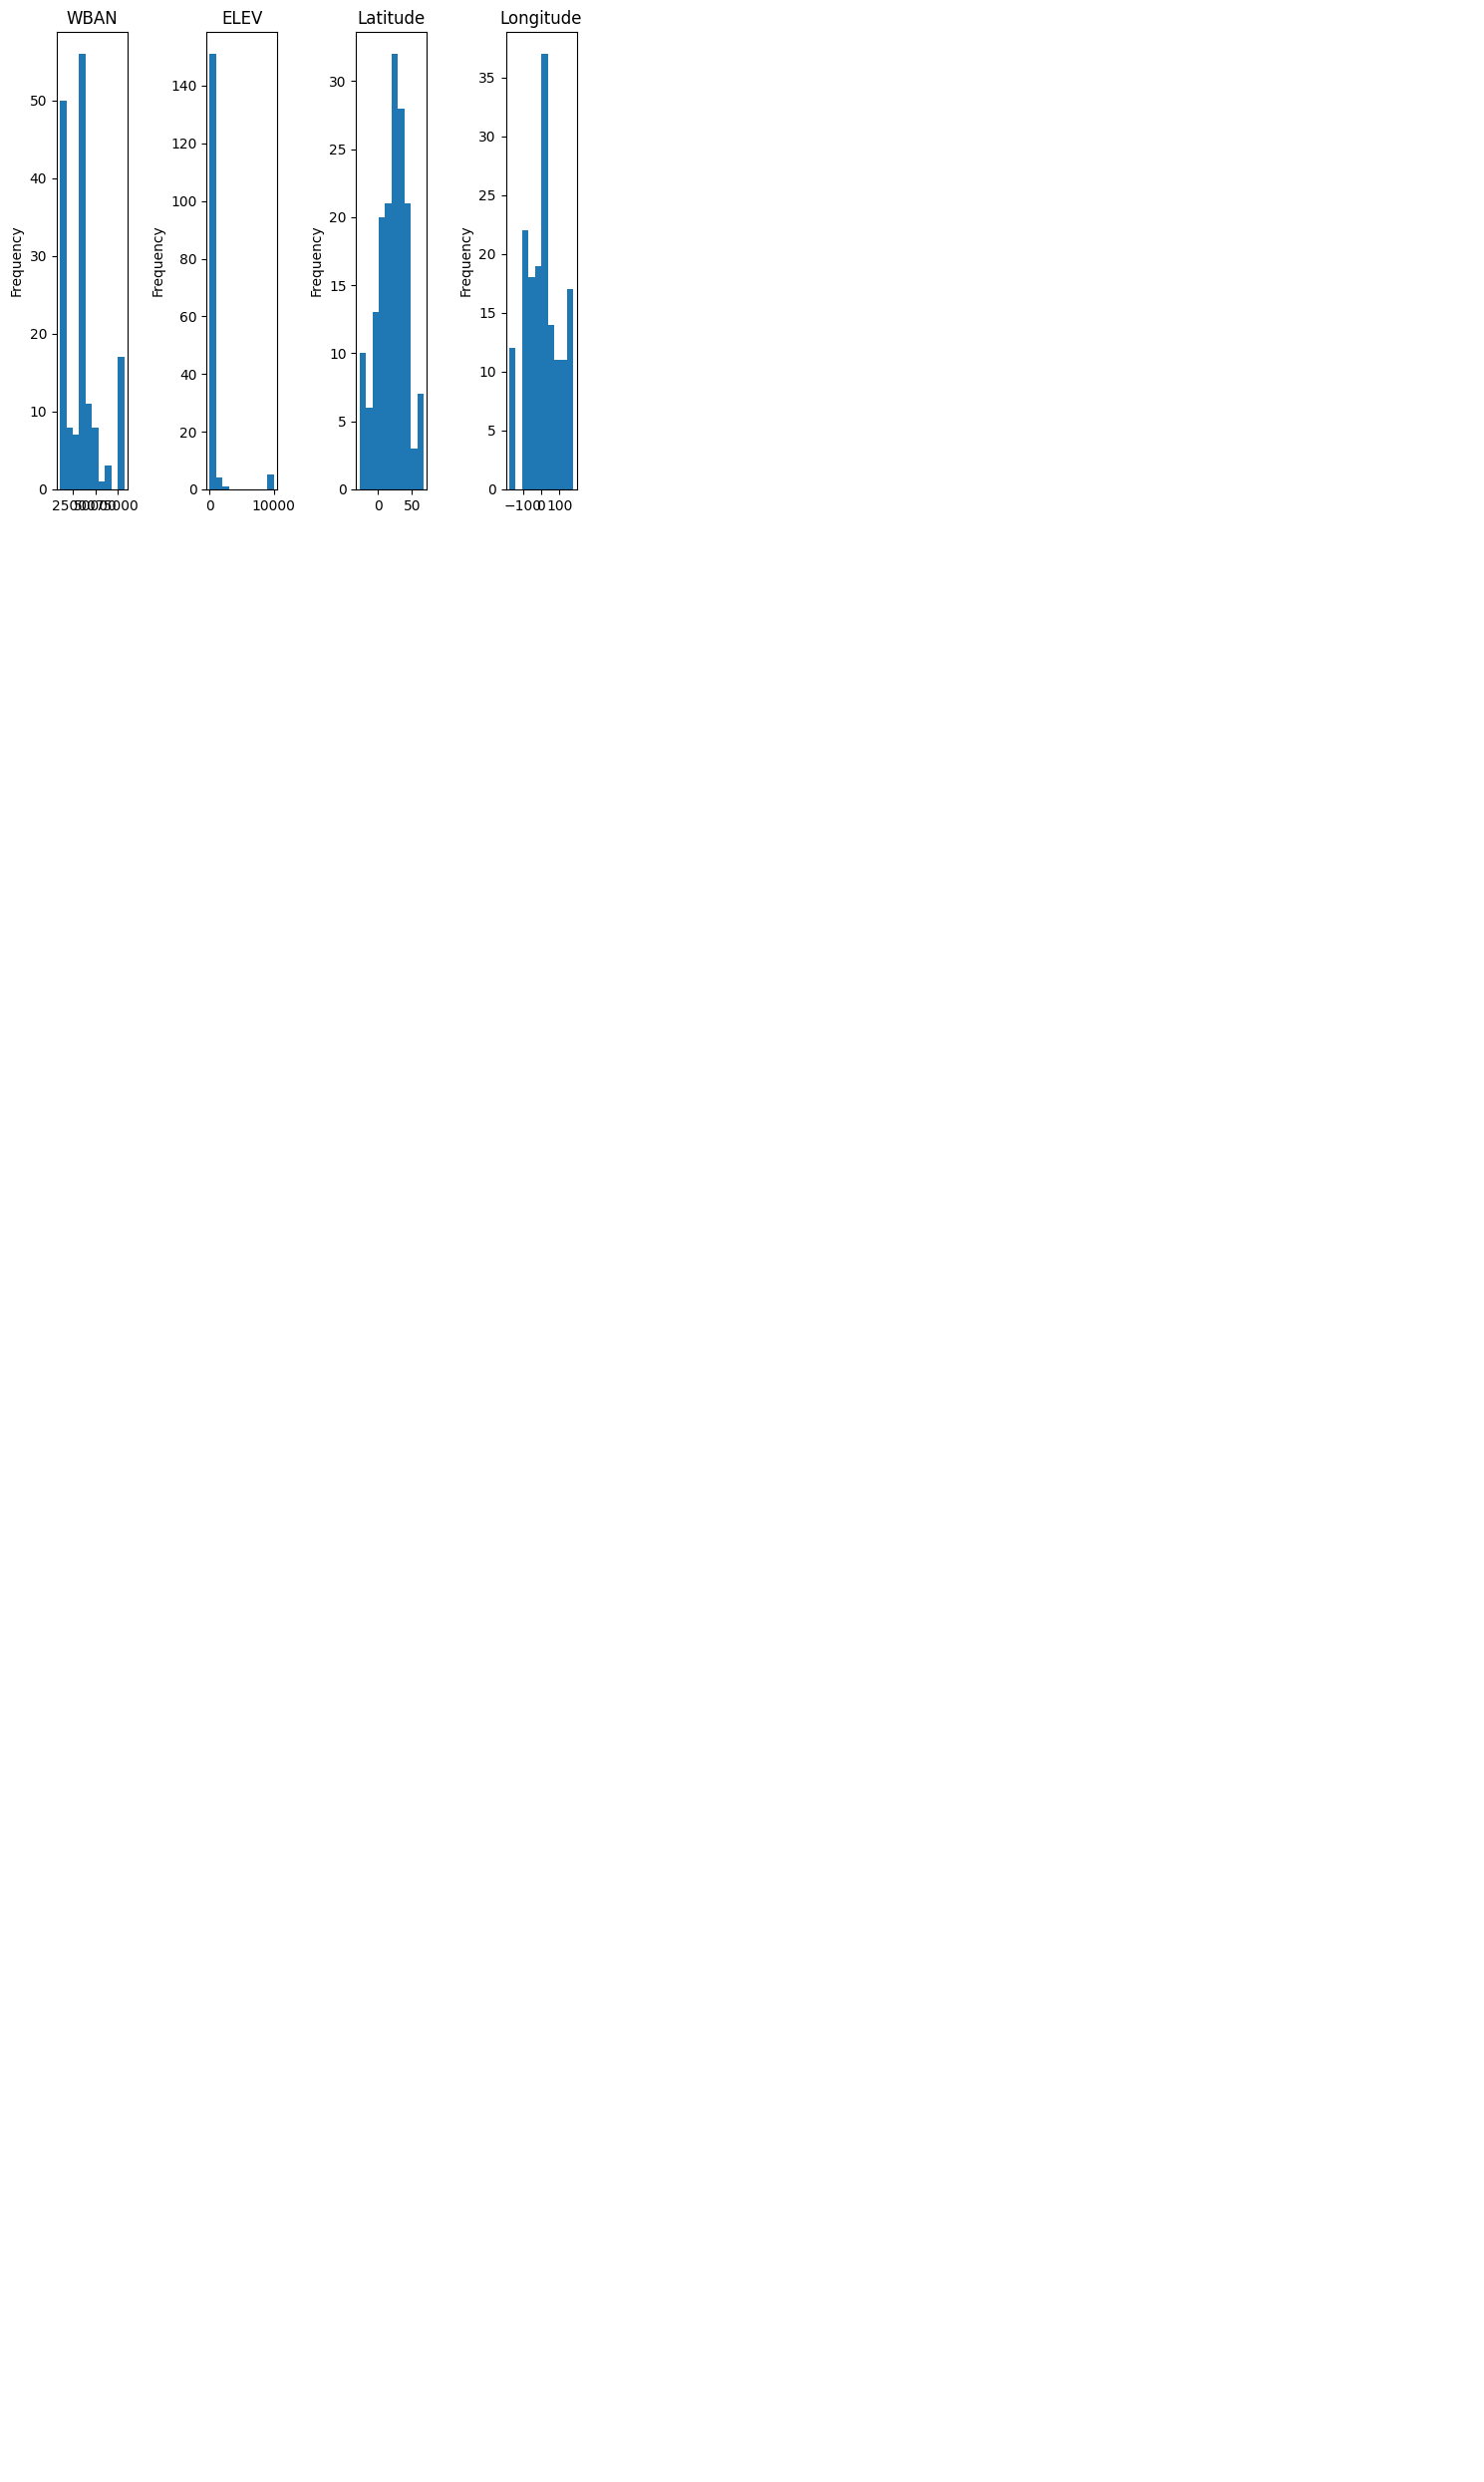

In [ ]:
plotHistogram(df2, 10, 5)

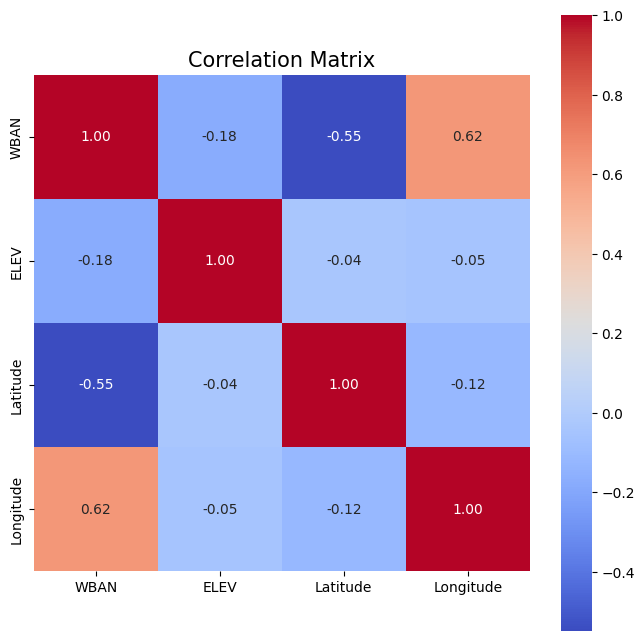

In [ ]:
plotCorrelationMatrix(df2, 8)

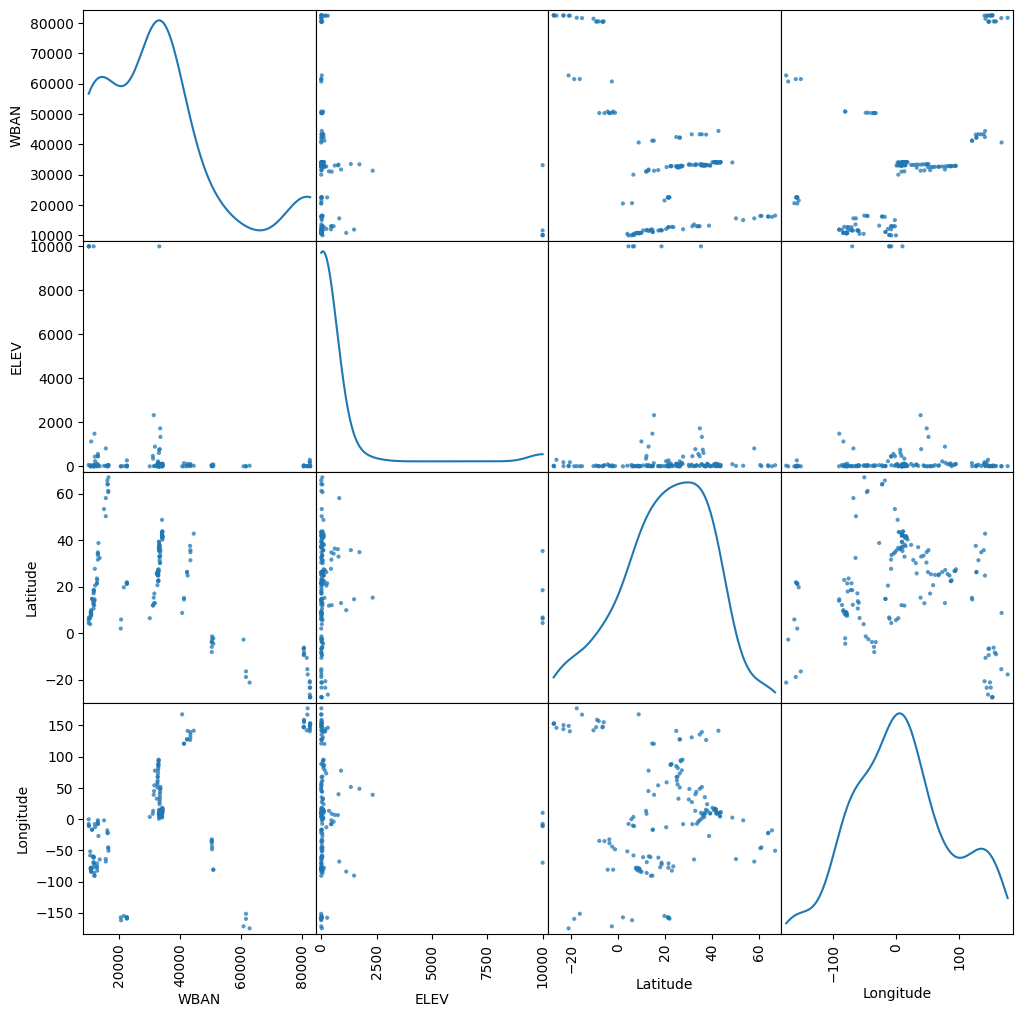

In [ ]:
plotScatterMatrix(df2, 12, 10)